Probar las ecuaciones del modelo de [Miyashima et al.](https://www.nature.com/articles/s41586-018-0839-y) para evaluar la frontera de transcripción entre las proteínas PEAR y los HD-ZIPIII. En resumen, lo que ellos modelan es una sola dimensión que representa las células que van del centro de la raíz hacia el exterior. Se simulan tres, cuatro o cinco células subdivididas por dos, tres o cuatro paredes, respectivamente. Los compartimentos se numeran de 1 (xilema) a $N$ (estele) donde $N$ es el total de compartimentos. El subconjunto de compartimentos celulares se denota por $K$ y el subconjunto de componentes de la pared por $W$. En la figura 1 se muestra un resumen de la dinámica del modelo así como la estructura de la red que proponen. 

<img src="myshima_model.png" style="width: 800px;">



## Difusión de los elementos. 
La difusión de los componentes se hace con elementos de difusión standard con la excepción de PEAR. Para simular el bloqueo de PEAR por HD-ZIPIII el coeficiente de difusión entre compartimentos adyacentes se modifica por una función decreciente del valor promedio de HD-ZIPIII entre dos compartimentos.
$$ J = D_{p} \Bigg( \frac{P_{i-1}-P_{i}}{1+ \Big( \frac{H_{i-1}+H_{i}}{2\phi}\Big)^{q}} \Bigg) $$
donde $J$ es el flujo de PEAR entre compartimentos $i$ e $i-1$, $D_{p}$ es el coeficiente de difusión, $P$ es la concentración de PEAR y $H$ la concentración de HD-ZIPIII.


## Funciones de activación transcripcional

La expresión génetica se hace con funciones de Hill siguiendo la lógica de activación o represión. HDZIPIII tiene una constante de activación más funciones de incremento de auxina y PEAR:
    $$F_{h}(A,P) = \lambda \Bigg(1 + \frac{A^{n_h}}{\theta_{h}^{n_h} + A^{n_h}} + \frac{P^{m_h}}{\psi_{h}^{m_h} + P^{m_h}}\Bigg)$$
Donde $\theta_{h}$ y $\psi_{h}$ son parámetros umbrales, $n_{h}$ y $m_{h}$ son coeficientes de Hill y $\lambda$ es una constante de proporcionalidad.

PEAR se activa por la respuesta a la citoquinina (WOL) y se reprime por HD-ZIPIII por lo que se usa el producto positivo de una función positiva y una negativa de forma Hill:
$$F_{p}(H,R) = \frac{\theta_{p}^{n_p}}{\theta_{p}^{n_p} + H^{n_P}} \times \frac{{R}^{m_p}}{\phi_{p}^{m_p} + R^{m_p}}$$
Donde $\theta_{p}$ y $\phi_{p}$ son parámetros umbrales, $n_{p}$ y $m_{p}$ son coeficientes de Hill.

La producción de citoquinina depende del input de auxina:
$$F_{c}(A) = \frac{A^{n_c}}{\theta_{c}^{n_c} + A^{n_c}}$$ 
Donde $\theta_{c}$ es el parámetro umbral.

Por último la respuesta a la citoquinina se regula positivamente por la citoquinina pero negativamente por la auxina:  
$$F_{r}(A,C) = \frac{\theta_{r}^{n_r}}{\theta_{r}^{n_r} + A^{n_r}} \times \frac{C^{m_r}}{\psi_{r}^{m_r} + C^{m_r}}  $$
Donde $\theta_{r}$ y $\psi_{r}$ son parámetros umbrales, $n_{r}$ y $m_{r}$ son coeficientes de Hill.


## Ecuaciones diferenciales para los compartimentos

Las funciones de transcripción se incorporan en una serie de ecuaciones diferenciales para cada compartimento y subcompartimento celular. Para $1 < i < N$ e $i \in K$ de compartimentos lejos de la frontera tenemos:

$$\frac{\partial M_{i}}{\partial t} = D_{m}(M_{i-1} + M_{i+1} -2M_{i}) -\mu_{m}M_{i}-\eta_{m}M_{i}H_{i}$$ 
$$\frac{\partial H_{i}}{\partial t} = \mu_{h}( F_{h}(\hat{A}_{i},\hat{P}_{i})-H_{i}-\eta_{h}M_{i}H_{i})$$
$$\frac{\partial P_{i}}{\partial t} = \mu_{p}( F_{p}(\hat{H}_{i},\hat{R}_{i})-P_{i}) + D_{p}\Bigg( \frac{P_{i-1}-P_{i}}{1+ \big(\frac{H_{i-1}+H_{i}}{2\phi}\big)^q} + \frac{P_{i+1}-P_{i}}{1+ (\frac{H_{i1}+H_{i+1}}{2\phi})^q}\Bigg)$$
$$\frac{\partial A_{i}}{\partial t} = \alpha_{i} - A_{i} + D_{a}(A_{i-1} + A_{1+1} - 2A_{i})$$
$$\frac{\partial C_{i}}{\partial t} = \mu_{c}(F_{c}(\hat{A}_{i})-C_{i}) + D_{c}(C_{i-1} + C_{1+1} - 2C_{i})$$
$$\frac{\partial R_{i}}{\partial t} = \mu_{r}(F_{r}(\hat{A}_{i},\hat{C}_{i})- R_{i})$$

Donde $D_{m}, D_{p}, D_{a}$ y $D_{c}$ son coeficientes de difusión de miRNA, PEAR, auxina y citoquinina. $\mu_{m}, \mu_{h}, \mu_{p}, \mu_{c}$ y $\mu_{r}$ son las tasas de recambio de miRNA, HD-ZIPIII, PEAR, citoquinina y respuesta a citoquinina (WOL). $\eta_{m}$ y $\eta_{h}$ son las tasas de degradación mutua entre miRNA y HD-ZIPIII. $\alpha_{i}$ es la tasa de producción de auxinas y se fija a 0 con excepción del compartimento 1 que representa el centro del estele. 

Las ecuaciones diferenciales son distintas para los compartimentos de frontera, fijando a 0 el flujo. A continuación se describen las ODE de los compartimentos de frontera. Para el centro del estele $(i=1)$:
$$\frac{\partial M_{1}}{\partial t} = D_{m}(M_{2} - M_{1}) - \mu_{m}M_{1}-\eta_{m}M_{1}H_{1}$$ 
$$\frac{\partial H_{1}}{\partial t} = \mu_{h}( F_{h}(\hat{A}_{1},\hat{P}_{1})-H_{1}-\eta_{h}M_{1}H_{1})$$
$$\frac{\partial P_{1}}{\partial t} = \mu_{p}( F_{p}(\hat{H}_{1},\hat{R}_{1})-P_{1}) + D_{p}\Bigg( \frac{P_{2}-P_{1}}{1+ \big(\frac{H_{1}+H_{2}}{2\phi}\big)^q}\Bigg)$$
$$\frac{\partial A_{1}}{\partial t} = \alpha_{1} - A_{1} + D_{a}(A_{2} + A_{1})$$
$$\frac{\partial C_{1}}{\partial t} = \mu_{c}(F_{c}(\hat{A}_{1})-C_{1}) + D_{c}(C_{2} - C_{1})$$
$$\frac{\partial R_{1}}{\partial t} = \mu_{r}(F_{r}(\hat{A}_{i},\hat{C}_{i})-R_{i})$$
Por último para la parte exterior del estele $(i=N)$ también se fija el flujo a 0 con excepción de miRNA. Las ecuaciones diferenciales son las siguientes:
$$\frac{\partial M_{N}}{\partial t} = D_{m}(M_{N-1} - 2M_{N} + M_{bnd}) - \mu_{m}M_{N}-\eta_{m}M_{N}H_{N}$$ 
$$\frac{\partial H_{N}}{\partial t} = \mu_{h}( F_{h}(\hat{A}_{N},\hat{P}_{N})-H_{N}-\eta_{h}M_{N}H_{N})$$
$$\frac{\partial P_{N}}{\partial t} = \mu_{p}( F_{p}(\hat{H}_{N},\hat{R}_{N})-P_{N}) + D_{p}\Bigg( \frac{P_{N-1}-P_{N}}{1+ \big(\frac{H_{N-1}+H_{N}}{2\phi}\big)^q}\Bigg)$$
$$\frac{\partial A_{N}}{\partial t} = - A_{N} + D_{a}(A_{N-1} + A_{N})$$
$$\frac{\partial C_{N}}{\partial t} = \mu_{c}(F_{c}(\hat{A}_{N})-C_{N}) + D_{c}(C_{N-1} - C_{N})$$
$$\frac{\partial R_{N}}{\partial t} = \mu_{r}(F_{r}(\hat{A}_{N},\hat{C}_{N})-R_{N})$$

En este cuaderno se modelan solo dos compartimentos celulares sin considerar subcompartimentos. A continuación se cargan los paquetes necesarios para determinar los valores en el equilibrio y además se usan los parámetros utilizados en la información suplementaria de Miyashima.

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt


In [198]:
#Load all the parameters of the model
lamda=0.5
tetha_h=1
psi_h=1
n_h=1
m_h=1
tetha_p=0.2
psi_p=0.1
n_p=4
m_p=1
tetha_c=0.1
n_c=1
tetha_r=0.1
psi_r=0.1
n_r=1
m_r=1
m_a=1
n_a=1
tetha_a=0.2
#Difusión
Dm=400
Dp=300
Da=10
Dc=1000
psi=0.005
q=2
#Recambio
mu_h=1
mu_p=1
mu_c=1
mu_r=1

# Interacción entre hdzipiii y mirna
M_bnd=1
teta_m=500
teta_h=1000
alpha_1=1
mu_m=1

#
t0=0
tf=10
n=100
t=np.linspace(t0,tf,n)

In [217]:
estado_inicial_genes=np.zeros((4,2))

In [156]:
def dx_dt(X,t):
    #X0=m1 X1=h1 X2=p1 X3=a1 X4=c1 X5=r1 X6=m2 X7=h2 X8=p2 X9=a2 X10=c2 X11=r2 X12=m2
    #Poner las funciones de activación trasncripcional
    f_h1 = lamda *(1 +((X[3]**n_h)/(tetha_h**n_h)+(X[3]**n_h))) + ((X[2]**m_h)/(psi_h**m_h + X[2]**m_h))
    f_h2 = lamda *(1 +((X[9]**n_h)/(tetha_h**n_h)+(X[9]**n_h))) + ((X[8]**m_h)/(psi_h**m_h + X[8]**m_h))
    f_p1 = tetha_p**n_p/((tetha_p**n_p) + X[1]**n_p) * ((X[5]**m_p)/((psi_p**m_p) + X[5]**m_p))
    f_p2 = tetha_p**n_p/((tetha_p**n_p) + X[7]**n_p) * ((X[11]**m_p)/((psi_p**m_p)+ X[11]**m_p))
    f_c1 = X[3]**n_c/((tetha_c**n_c)+ X[3]**n_c)
    f_c2 = X[9]**n_c/((tetha_c**n_c)+ X[9]**n_c)
    f_r1 = tetha_r**n_r/((tetha_r**n_r)+X[3]**n_r) * ((X[4]**m_r)/((psi_r**m_r)+X[4]**m_r))
    f_r2 = tetha_r**n_r/((tetha_r**n_r)+X[9]**n_r) * ((X[10]**m_r)/((psi_r**m_r)+X[10]**m_r))
    dm1dt= Dm*(X[6]-X[0])- (mu_m*X[0]) - (teta_m*X[0]*X[1])
    dm2dt= Dm*(X[0]-(2*X[6])+M_bnd)-(mu_m*X[6])- (teta_m*X[6]*X[7])
    dh1dt= mu_h*(f_h1-X[1]-(teta_h*X[0]*X[1]))
    dh2dt= mu_h*(f_h2-X[7]-(teta_h*X[6]*X[7]))
    dp1dt= mu_p*(f_p1-X[2])+ Dp*((X[8]-X[2])/1+(((X[1]+X[7])/(2*psi))**q))
    dp2dt= mu_p*(f_p2-X[8])+ Dp*((X[2]-X[8])/1+(((X[1]+X[7])/(2*psi))**q))
    da1dt= alpha_1 -X[3]+Da*(X[9]-X[3])
    da2dt= -X[9]+Da*(X[3]-X[9])
    dc1dt= mu_c*(f_c1 - X[4])+Dc*(X[10]-X[4])
    dc2dt= mu_c*(f_c2 -X[10])+Dc*(X[4]-X[10])
    dr1dt= mu_r*(f_r1 -X[5])  
    dr2dt= mu_r*(f_r2 -X[11])
    return np.array([dm1dt,dh1dt,dp1dt,da1dt,dc1dt, dr1dt,dm2dt,dh2dt,dp2dt,da2dt,dc2dt, dr2dt])
    #Regresar un arreglo con los valores de los 6 elementos de la red en la célula1 y célula2   

In [164]:
def dx_dt(X,t):
    #X0=m1 X1=h1 X2=p1 X3=a1 X4=c1 X5=r1 X6=m2 X7=h2 X8=p2 X9=a2 X10=c2 X11=r2 X12=m3
    #X13=h3 X14=p3 X15=a3 X16=c3 X17=r3 X18=m4 X19=h4 X20=p4 X21=a4 X22=c4 X23=r4
    #Poner las funciones de activación trasncripcional
    f_h1 = lamda *(1 + X[3]**n_h/(tetha_h**n_h+ X[3] **n_h)) + (X[2]**m_h/(psi_h**m_h + X[2]**m_h))
    f_h2 = lamda *(1 + X[9]**n_h/(tetha_h**n_h+X[9]**n_h)) + (X[8]**m_h/(psi_h**m_h + X[8]**m_h))
    f_h3 = lamda *(1 + X[15]**n_h/(tetha_h**n_h+X[15]**n_h)) + (X[14]**m_h/(psi_h**m_h + X[14]**m_h))
    f_h4 = lamda *(1 + X[21]**n_h/(tetha_h**n_h+ X[21] **n_h)) + (X[20]**m_h/(psi_h**m_h + X[20]**m_h))
    
    f_p1 = (tetha_p**n_p/(tetha_p**n_p+X[1]**n_p)) * (X[5]**m_p/(psi_p**m_p + X[5]**m_p))
    f_p2 = (tetha_p**n_p/(tetha_p**n_p+X[7]**n_p)) * (X[11]**m_p/(psi_p**m_p + X[11]**m_p))
    f_p3 = (tetha_p**n_p/(tetha_p**n_p+X[13]**n_p)) * (X[17]**m_p/(psi_p**m_p + X[17]**m_p))
    f_p4 = (tetha_p**n_p/(tetha_p**n_p+X[19]**n_p)) * (X[23]**m_p/(psi_p**m_p + X[23]**m_p))
    
    f_c1 = X[3]**n_c/(tetha_c**n_c)+ X[3]**n_c
    f_c2 = X[9]**n_c/(tetha_c**n_c)+ X[9]**n_c
    f_c3 = X[15]**n_c/(tetha_c**n_c)+ X[15]**n_c
    f_c4 = X[21]**n_c/(tetha_c**n_c)+ X[21]**n_c
    
    f_r1 = (tetha_r**n_r)/((tetha_r**n_r)+X[3]**n_r) * (X[4]**m_r)/((psi_r**m_r)+X[4]**m_r)
    f_r2 = (tetha_r**n_r)/((tetha_r**n_r)+X[9]**n_r) * (X[10]**m_r)/((psi_r**m_r)+X[10]**m_r)
    f_r3 = (tetha_r**n_r)/((tetha_r**n_r)+X[15]**n_r) * (X[16]**m_r)/((psi_r**m_r)+X[16]**m_r)
    f_r4 = (tetha_r**n_r)/((tetha_r**n_r)+X[21]**n_r) * (X[22]**m_r)/((psi_r**m_r)+X[22]**m_r)
    
    dm1dt= Dm*(X[6]-X[0])-mu_m*X[0]- teta_m*X[0]*X[1]
    dm2dt= Dm*(X[0]+ X[12]-2*X[6])-mu_m*X[6]-teta_m*X[6]*X[7]
    dm3dt= Dm*(X[6]+ X[18]-2*X[12])-mu_m*X[12]-teta_m*X[12]*X[13]
    dm4dt= Dm*(X[12]-2*X[18]+M_bnd)-mu_m*X[18]-teta_m*X[18]*X[19]    
    
    dh1dt= mu_h*(f_h1-X[1] -teta_h*X[0] *X[1])
    dh2dt= mu_h*(f_h2-X[7] -teta_h*X[6] *X[7])
    dh3dt= mu_h*(f_h3-X[13]-teta_h*X[12]*X[13])
    dh4dt= mu_h*(f_h4-X[19]-teta_h*X[18]*X[19])
    
    dp1dt= mu_p*(f_p1 - X[2])+ Dp*(X[8]-X[2]/1+(X[1]+X[7]/2*psi)**q)
    dp2dt= mu_p*(f_p2 - X[8])+ Dp*((X[2]-X[8]/1+(X[1]+X[7]/2*psi)**q)+(X[14]-X[8]/1+(X[7]+X[13]/2*psi)**q))
    dp3dt= mu_p*(f_p3 - X[14])+ Dp*((X[8]-X[14]/1+(X[7]+X[13]/2*psi)**q)+(X[20]-X[14]/1+(X[19]+X[13]/2*psi)**q))
    dp4dt= mu_p*(f_p4 - X[20])+ Dp*(X[14]-X[20]/1+(X[13]+X[19]/2*psi)**q)
    
    da1dt= alpha_1 - X[3] + Da*(X[9]-X[3])
    da2dt= 0 -X[9] +Da*(X[3]+X[15]-2*X[9])
    da3dt= 0 -X[15]+Da*(X[9]+X[21]-2*X[15])
    da4dt= -X[21]+Da*(X[15]-X[21])
    
    dc1dt= mu_c*(f_c1 - X[4])+ Dc*(X[10]-X[4])
    dc2dt= mu_c*(f_c2 -X[10])+Dc*(X[4]+X[16]-2*X[10])
    dc3dt= mu_c*(f_c3 -X[16])+Dc*(X[10]+X[22]-2*X[16])
    dc4dt= mu_c*(f_c4 -X[22])+Dc*(X[16]-X[22])
    
    dr1dt= mu_r*(f_r1 - X[5])  
    dr2dt= mu_r*(f_r2 -X[11])
    dr3dt= mu_r*(f_r3 -X[17])
    dr4dt= mu_r*(f_r4 -X[23])
    return np.array([dm1dt,dh1dt,dp1dt,da1dt,dc1dt, dr1dt,
                     dm2dt,dh2dt,dp2dt,da2dt,dc2dt, dr2dt,
                     dm3dt,dh3dt,dp3dt,da3dt,dc3dt,dr3dt,
                     dm4dt,dh4dt,dp4dt,da4dt,dc4dt,dr4dt])

In [202]:
dx_dt_0= np.array([0,2,0,0,0,0,
                   0,0,0,0,0,0,
                   0,0,0,0,0,0,
                   0,0,0,0,0,0])
#print(dx_dt_0)
## plot results
X, infodict = integrate.odeint(dx_dt ,dx_dt_0, t, full_output=True)
# infodict['message']                      # integration successful


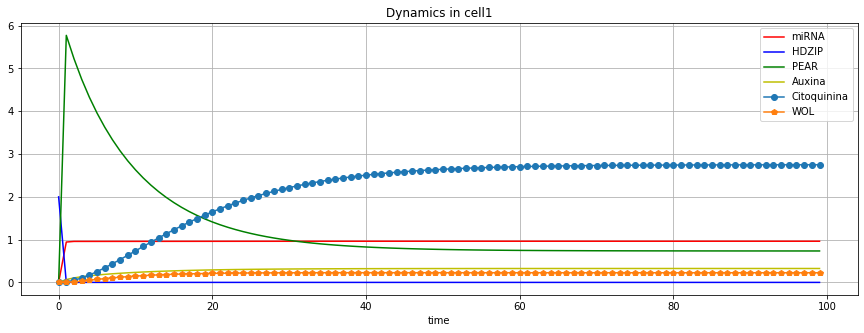

In [203]:
x,y,z,w,a,b,x2,y2,z2,w2,a2,b2,x3,y3,z3,w3,a3,b3,x4,y4,z4,w4,a4,b4 = X.T
#x,y,z,w,a,b,x2,y2,z2,w2,a2,b2 = X.T
#plot

fig1 = plt.figure(figsize=(15,5))
#fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax = plt.subplot('111')
ax.plot(x, 'r-', label='miRNA')
ax.plot(y, 'b-', label='HDZIP')
ax.plot(z, 'g-', label='PEAR')
ax.plot(w, 'y-', label='Auxina')
ax.plot(a, 'o-', label='Citoquinina')
ax.plot(b, 'p-', label='WOL')
ax.set_xlabel('time')
ax.set_title("Dynamics in cell1")
ax.grid()
ax.legend(loc='best')



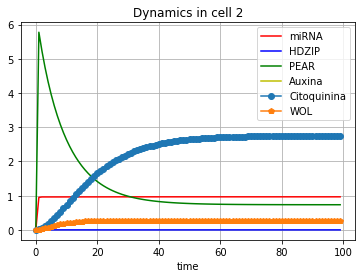

In [204]:
ax2 = plt.subplot('111')
ax2.plot(x2, 'r-', label='miRNA')
ax2.plot(y2, 'b-', label='HDZIP')
ax2.plot(z2, 'g-', label='PEAR')
ax2.plot(w2, 'y-', label='Auxina')
ax2.plot(a2, 'o-', label='Citoquinina')
ax2.plot(b2, 'p-', label='WOL') 
ax2.set_title("Dynamics in cell 2")
ax2.set_xlabel("time")
ax2.grid()
ax2.legend(loc='best')



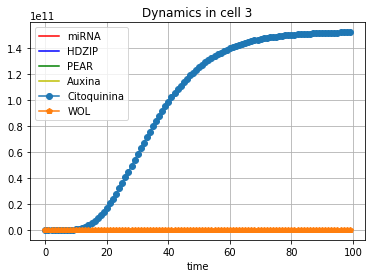

In [197]:
ax3 = plt.subplot('111')
ax3.plot(x3, 'r-', label='miRNA')
ax3.plot(y3, 'b-', label='HDZIP')
ax3.plot(z3, 'g-', label='PEAR')
ax3.plot(w3, 'y-', label='Auxina')
ax3.plot(a3, 'o-', label='Citoquinina')
ax3.plot(b3, 'p-', label='WOL') 
ax3.set_title("Dynamics in cell 3")
ax3.set_xlabel("time")
ax3.grid()
ax3.legend(loc='best')


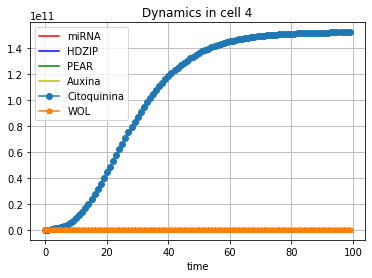

In [173]:
ax4 = plt.subplot('111')
ax4.plot(x4, 'r-', label='miRNA')
ax4.plot(y4, 'b-', label='HDZIP')
ax4.plot(z4, 'g-', label='PEAR')
ax4.plot(w4, 'y-', label='Auxina')
ax4.plot(a4, 'o-', label='Citoquinina')
ax4.plot(b4, 'p-', label='WOL') 
ax4.set_title("Dynamics in cell 4")
ax4.set_xlabel("time")
ax4.grid()
ax4.legend(loc='best')


In [155]:
#def dx_dt(X,t):
    #Poner las funciones de activación trasncripcional
#    f_h1 = lamda *(1 +((X[0][3]**n_h)/(tetha_h**n_h)+(X[0][3]**n_h))) + ((X[2]**m_h)/(psi_h**m_h + X[0][2]**m_h))
 #   f_p1 = tetha_p**n_p/((tetha_p**n_p) + X[1]**n_p) * ((X[5]**m_p)/((psi_p**m_p) + X[5]**m_p))
  #  f_c1 = X[3]**n_c/((tetha_c**n_c)+ X[3]**n_c)
   # f_r1 = tetha_r**n_r/((tetha_r**n_r)+X[3]**n_r) * ((X[4]**m_r)/((psi_r**m_r)+X[4]**m_r)) 
    #dm1dt= Dm*(X[+1][0]-X[0])- (mu_m*X[0]) - (teta_m*X[0]*X[1])
#    dh1dt= mu_h*(f_h1-X[1]-(teta_h*X[0]*X[1]))
 #   dp1dt= mu_p*(f_p1-X[2])+ Dp*((X[+1][2]-X[2])/1+(((X[1]+X[+1][7])/(2*psi))**q))
  #  da1dt= alpha_1 -X[3]+Da*(X[+1][3]-X[3])
   # dc1dt= mu_c*(f_c1 - X[4])+Dc*(X[+1][4]-X[4])
    #dr1dt= mu_r*(f_r1 -X[5])  
    #return np.array([dm1dt,dh1dt,dp1dt,da1dt,dc1dt, dr1dt])
    #Regresar un arreglo con los valores de los 6 elementos de la red en la célula1 y célula2   
#def dx_dt_1(X,t):
 #   f_h2 = lamda *(1 +((X[3]**n_h)/(tetha_h**n_h)+(X[3]**n_h))) + ((X[2]**m_h)/(psi_h**m_h + X[2]**m_h))
  #  f_c2 = X[3]**n_c/((tetha_c**n_c)+ X[3]**n_c)
   # f_p2 = tetha_p**n_p/((tetha_p**n_p) + X[1]**n_p) * ((X[5]**m_p)/((psi_p**m_p)+ X[5]**m_p))
    #f_r2 = tetha_r**n_r/((tetha_r**n_r)+X[3]**n_r) * ((X[4]**m_r)/((psi_r**m_r)+X[4]**m_r))   
    #dm2dt= Dm*(X[-1][0]-(2*X[0])+M_bnd)-(mu_m*X[0])- (teta_m*X[0]*X[1])
#    dh2dt= mu_h*(f_h2-X[1]-(teta_h*X[0]*X[1]))
 #   dp2dt= mu_p*(f_p2-X[2])+ Dp*((X[-1][2]-X[2])/1+(((X[-1][1]+X[1])/(2*psi))**q))
  #  da2dt= -X[3]+Da*(X[-1][3]-X[3])
   # dc2dt= mu_c*(f_c2 -X[4])+Dc*(X[-1][4]-X[4])
    #dr2dt= mu_r*(f_r2 -X[5])
  #  return np.array([dm2dt,dh2dt,dp2dt,da2dt,dc2dt, dr2dt])


#estado_inicial_genes=np.zeros((2,6))

#for i in range(2):
#    X, infodict = integrate.odeint(dx_dt ,estado_inicial_genes[0], t, full_output=True)
#    X, infodict = integrate.odeint(dx_dt_1 ,estado_inicial_genes[1], t, full_output=True)

IndexError: invalid index to scalar variable.

In [226]:
external_cells= [0,3]
y=[0,10,10,0]

def diff(NUMPY_MULTIARRAY,coeficiente, array_mol):#FUNCION QUE CALCULA LA DIFUSION
    flux = np.zeros(len(NUMPY_MULTIARRAY))#ARRAGLO PARA GUARDAR LA DIFUSION EN CADA CELULA
    print(flux)
    for e in range(len(NUMPY_MULTIARRAY)):#LOOP PARA CALCULAR LA DIFUSION EN CADA CELULA
        if e in external_cells:#CHECA LA POSICION DE LA CELULA
            flux[e] = -coeficiente*(NUMPY_MULTIARRAY[e]-array_mol[1])#SI TIENE SOLO UN VECINO
        else:
            flux[e] = -coeficiente*(2*NUMPY_MULTIARRAY[e]-array_mol[0]-array_mol[2])#SI TIENE DOS VECINOS
    return flux
#print(estado_inicial_genes)

fluxdm=diff(y,Dm,y)  

def dmdt(array):
    temp=diff(y,Dm,y)
    array_g = np.zeros(len(temp))
    array_t=array.transpose()
    for i in range(len(temp)):
        array_g[i]= temp[i] - mu_m*array_t[0][i] - teta_m*array_t[0][i]*array_t[1][i]
    return array_g
   
print(dmdt(estado_inicial_genes))

def dcdt(array):
    temp=diff(y,Dm,y)
    array_p = np.zeros(len(temp))
    array_t=array.transpose()
    for i in range(len(temp)):
        array_g[i]= temp[i] + mu_c* ( -(array_t[i]))
    return array_g
dc1dt= mu_c*(f_c1 - X[4])+ Dc*(X[10]-X[4])
 f_c1 = X[3]**n_c/(tetha_c**n_c)+ X[3]**n_c
#FUNCION QUE CALCULARA LA DIFUSION
#ef flux(NUMPY_MULTIARRAY, t, pars, external_cells):
 
#   NOMBRES DE TUS PARAMETROS = pars
#   return  diffusion(NUMPY_MUTIARRAY, PARAMETERS,EXTERNAL_CELLS) #AQUI PODRIA PONER UNA SUMA PARA INCLUIR LAS REGULACIONE CON ECUACIONES DE HILL
   
#AQUI IRIA LA CELULA 1 Y 3, DEFINES QUIENES SON LAS CELULAS QUE ESTAN EN LOS EXTREMOS 


# = linspace(0,dt,10)
# = integrate.odeint(flux,NUMPY_MULTIARRAY,t,args = (params,external_cells)) #ESTA ES LA FUNCION DE INTEGRACION



[0. 0. 0. 0.]
[0. 0. 0. 0.]
[ 4000. -4000. -4000.  4000.]
